## CIFAR 10 Computer Vision project

### 1.0 Importações

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model



In [42]:
import logging
import datetime

# Define o formato da mensagem de log
log_format = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'

# Configura o nível de log e o formato da mensagem
logging.basicConfig(level=logging.DEBUG, format=log_format)

# Exemplo de uso de log com timestamp
current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
logging.info(f"Treinamento iniciado às {current_time}.")

# Exemplo de uso de log com formatação personalizada
epochs = 10
logging.info(f"Treinamento completo em {epochs} épocas.")


INFO:root:Treinamento iniciado às 2023-03-25 13:39:13.
INFO:root:Treinamento completo em 10 épocas.


### 2.0 Carregando os dados e preparando

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


### 3.0 Criando o modelo

##### 3.1 Construção

In [161]:
# Define the CNN model architecture
model = keras.Sequential(
    [
        layers.Conv2D(64, (3, 3), activation="relu", input_shape=(64, 64, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


##### 3.2 Fit

In [162]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10


ValueError: in user code:

    File "/home/michel/anaconda3/envs/cv/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/michel/anaconda3/envs/cv/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/michel/anaconda3/envs/cv/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/michel/anaconda3/envs/cv/lib/python3.9/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/michel/anaconda3/envs/cv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/michel/anaconda3/envs/cv/lib/python3.9/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(None, 32, 32, 3)


##### 3.3 Validação simples

In [4]:
# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.9590811729431152
Test accuracy: 0.695900022983551
saving the model


### 4.0 Visualização

In [66]:
# Load an image from the directory
img = keras.preprocessing.image.load_img('images/carro1.jpeg')
img2 = keras.preprocessing.image.load_img('images/gato1.jpg')

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
# Function to preprocess the uploaded image
def preprocess_image(img):
    #img = Image.open(image)
    img = img.resize((32, 32))
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [67]:
image_array= preprocess_image(img)

In [160]:
# Make predictions
predictions = model.predict(image_array2)
logging.debug("The predictied probabilities are: \n{}".format(list(predictions)))
# Get the index of the highest probability
class_index = np.argmax(predictions)
logging.debug("The predicted class index is: {}".format(class_index))
# Get the class name by using the index
class_name = class_names[class_index]
logging.debug("The predicted class name is: {}".format(class_names[class_index]))


1/1 [==============================] - 0s 52ms/step


DEBUG:root:The predictied probabilities are: 
[array([3.13063283e-05, 1.21192185e-08, 1.96471298e-03, 7.00879872e-01,
       1.93616729e-02, 4.59172949e-02, 6.16501959e-04, 2.30740592e-01,
       4.63492506e-06, 4.83399519e-04], dtype=float32)]
DEBUG:root:The predicted class index is: 3
DEBUG:root:The predicted class name is: cat


In [154]:
conv_layer_model = tf.keras.models.Model(
    model.inputs,
    model.layers[0].output
)

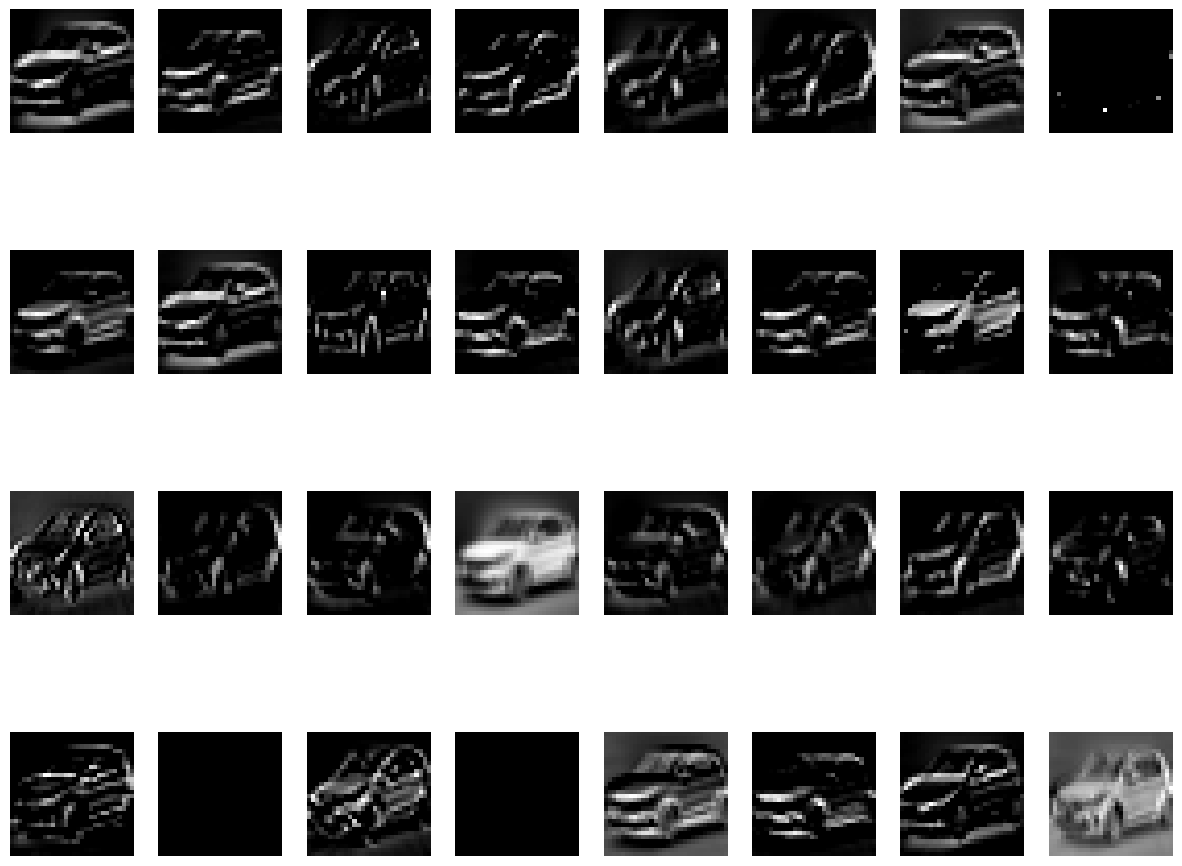

In [159]:
conv_output = conv_layer_model(image_array)
conv_output = np.squeeze(conv_output)


# Plot the output of the first convolutional layer
fig, axs = plt.subplots(4, 8, figsize=(15, 12))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(conv_output[:, :, i], cmap='gray')
    plt.axis('off')
plt.show()